In [11]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_da = df[df["job_title_short"] == "Data Analyst"].copy()
df_da["job_posted_month"] = df_da["job_posted_date"].dt.month
df_dae = df_da.explode("job_skills")

In [13]:
df_daep = df_dae.pivot_table(index = "job_posted_month", columns = "job_skills", aggfunc = "size")
df_daep.loc["total"] = df_daep.sum()
df_daep = df_daep[df_daep.loc["total"].sort_values(ascending=False).index]
df_daep = df_daep.drop("total")



<Axes: >

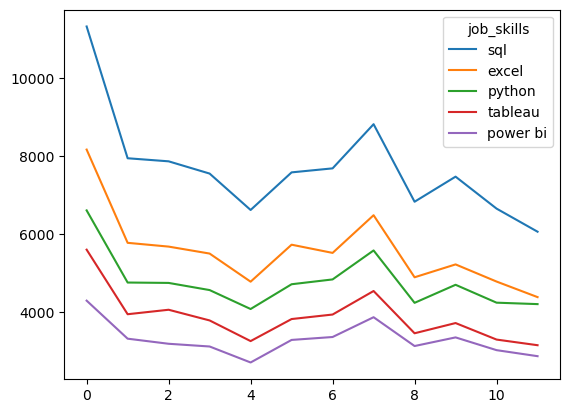

In [14]:
df_daep = df_daep.reset_index()
df_daep["job_posted_month_short"] = df_daep["job_posted_month"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%B"))
df_deap = df_daep.set_index("job_posted_month_short")
df_daep = df_daep.drop(columns="job_posted_month")
df_daep.iloc[:,0:5].plot(kind="line")
# Come back to this! I want to show short months not numbers!!!!